<a href="https://colab.research.google.com/github/dilp90/Modelado_y_Simulacion_de_Sistemas_Mecatronicos/blob/main/PenduloRobot_1GdL/Python_PenduloRobot_1GdL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# -----------------------------------------------------------------
# SIMULACIÓN DE UN ROBOT PÉNDULO DE 1 GDL (Versión en Python)
# -----------------------------------------------------------------
# Este script simula la dinámica de un robot péndulo simple.
# Es el equivalente a los archivos ResPS.m y f.m de MATLAB.

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# -----------------------------------------------------------------
# 1. Definición de la Ecuación Dinámica (Equivalente a f.m)
# -----------------------------------------------------------------
# Esta función es llamada por el solver (solve_ivp) para calcular la
# derivada del vector de estados en un tiempo 't' y un estado 'x' dados.

def f(t, x):
    # 1. Parámetros del modelo (del libro de F. Reyes Cortés)
    m = 5.0      # Masa de la barra (kg)
    lc = 0.01    # Distancia al centro de masa de la barra (m)
    g = 9.81     # Aceleración de la gravedad (m/s^2)
    b = 0.14     # Coeficiente de fricción viscosa (Nms/rad)
    fc = 0.45    # Coeficiente de fricción de Coulomb (Nm)
    Ir = 0.16    # Inercia rotacional del péndulo (mlc^2 + I)

    # 2. Vector de Estados (Entrada)
    # 'x' es un vector 1D de NumPy:
    q = x[0]   # Posición articular (rad)
    qp = x[1]  # Velocidad articular (rad/s)

    # 3. Ecuación Dinámica (Modelo Físico)
    # Basado en la ecuación de movimiento despejando la aceleración (qpp):
    # qpp = (1/Ir) * [tau - mglc*sin(q) - b*qp - fc*sign(qp)]

    # Torque de entrada (motor)
    tau_motor = tau(t)

    # Modelo de Fricción de Coulomb (Stribeck)
    # Usamos np.tanh(c*qp) como una aproximación suave de sign(qp)
    # para evitar discontinuidades que afecten al solver.
    # El signo negativo indica que la fricción se opone al movimiento.
    friccion_coulomb = fc * np.tanh(100000 * qp)

    # Cálculo de la aceleración articular (qpp)
    qpp = (1/Ir) * (tau_motor - m*g*lc*np.sin(q) - b*qp - friccion_coulomb)

    # 4. Vector de Salida (Derivada del Estado)
    # El solver necesita la derivada del vector de estados:
    # d/dt [q]  = [ qp ]
    # d/dt [qp] = [ qpp]
    dxdt = [qp, qpp]

    return dxdt

# --- Función para el Torque de Entrada ---
def tau(t):
    # Se aplica un torque sinusoidal con amplitud 1.5 Nm
    return 1.5 * np.sin(t)



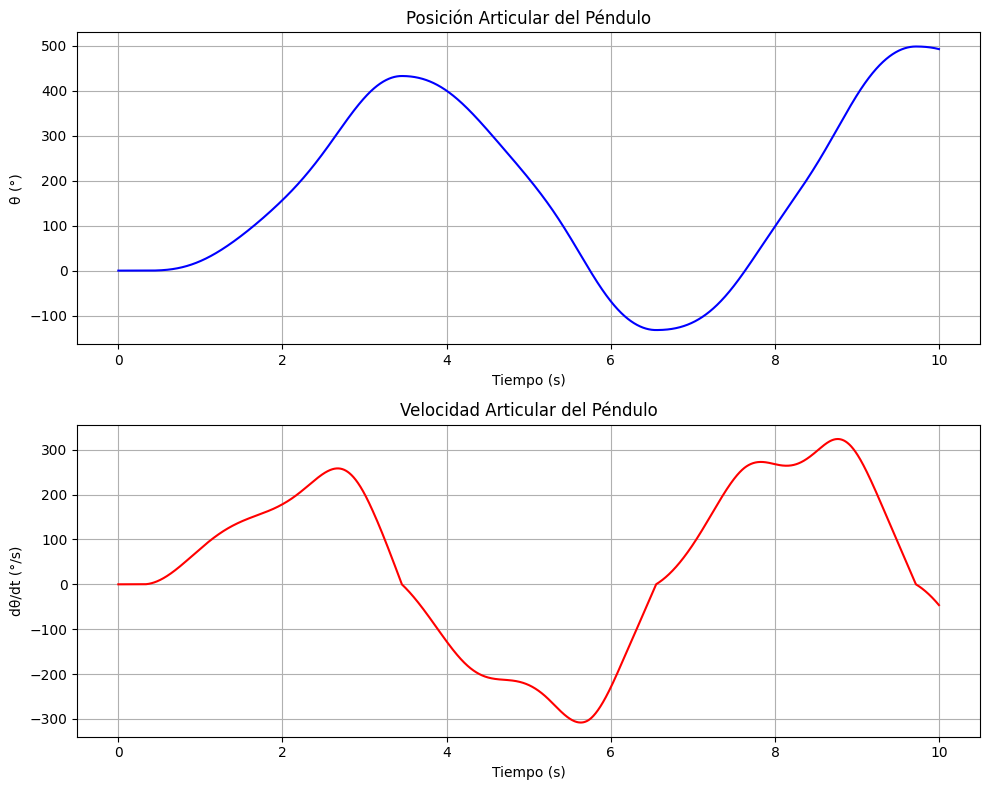

In [5]:
# -----------------------------------------------------------------
# 2. Script Principal de Simulación (Equivalente a ResPS.m)
# -----------------------------------------------------------------

# 1. Parámetros de Simulación
ti = 0.0     # Tiempo inicial (s)
tf = 10.0    # Tiempo final (s)
h = 0.0025   # Tamaño de paso (step size) para el muestreo

# Vector de tiempo para la evaluación (puntos donde queremos la solución)
ts = np.arange(ti, tf, h)

# 2. Condiciones Iniciales
q0 = 0.0   # Posición inicial (0 rad)
qp0 = 0.0  # Velocidad inicial (0 rad/s)
x0 = [q0, qp0] # Vector de estado inicial

# 3. Resolución de la Ecuación Diferencial
# Se utiliza solve_ivp (el solver moderno de SciPy, similar a ode45).
# Llama a la función f, en el intervalo [ti, tf],
# comenzando desde x0, y evalúa la solución en los puntos ts.
sol = solve_ivp(f, [ti, tf], x0, t_eval=ts)

# 'sol' es un objeto que contiene la solución.
# sol.t -> Vector de tiempo
# sol.y -> Matriz de estados (cada *columna* es un estado en el tiempo t)

# Extraemos los resultados
t = sol.t
# sol.y[0] -> Todas las posiciones (q)
# sol.y[1] -> Todas las velocidades (qp)
posicion = sol.y[0]
velocidad = sol.y[1]

# 4. Procesamiento y Gráficas de Resultados
# Convertimos radianes a grados para visualización
posicion_grados = np.rad2deg(posicion)
velocidad_grados = np.rad2deg(velocidad)

# Crear la figura y los ejes (subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfica de Posición
ax1.plot(t, posicion_grados, 'b-', label='Posición (q)')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('θ (°)')
ax1.set_title('Posición Articular del Péndulo')
ax1.grid(True)

# Gráfica de Velocidad
ax2.plot(t, velocidad_grados, 'r-', label='Velocidad (qp)')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('dθ/dt (°/s)')
ax2.set_title('Velocidad Articular del Péndulo')
ax2.grid(True)

# Ajusta el layout para que no se solapen y muestra la gráfica
plt.tight_layout()
plt.show()